In [1]:
%cd ..

/mnt/ceph/users/zzhang/CRISPR_pred/crispr_kinn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ftz2hi7f because the default path (/home/zzhang/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


kinn_sty = {
    "axes.titlesize": 18,
    "axes.labelsize": 20,
    "lines.linewidth": 1,
    "lines.markersize": 10,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "font.size": 18,
    "font.sans-serif": 'Helvetica',
    "text.usetex": False,
    'mathtext.fontset': 'cm',
}
plt.style.use(kinn_sty)

In [3]:
df = pd.read_table("outputs/simData_20211130/outputs-20211130-random/train_history.tsv")

In [4]:
genavg = df[['gen', 'test_pcc']].groupby('gen').mean()
best_ind = [max(df.query(f'gen<={x}')['test_pcc']) for x in genavg.index ]

In [5]:
plot_df = pd.DataFrame({'GenAvg': genavg['test_pcc'], 'Best': best_ind, 'Generation':genavg.index})

(0.3, 0.95)

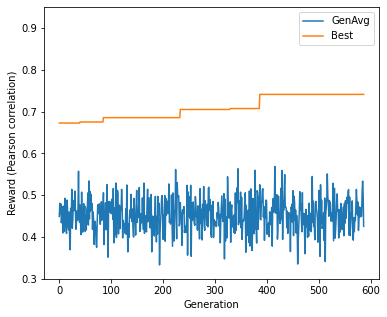

In [7]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
plot_df.plot.line(x='Generation', y=['GenAvg', 'Best'], ax=ax)
ax.set_ylabel("Reward (Pearson correlation)")
ax.set_xlabel("Generation")
ax.set_ylim(0.3, 0.95)
#ax.set_title("Sampling from Prior\n(disable posterior update)")
#plt.savefig("reward_over_time.png")